In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
nycgreen=pd.read_parquet(r"/content/drive/MyDrive/sem6/AAI/green_tripdata_2024-05.parquet")

In [5]:
nycgreen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61003 entries, 0 to 61002
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               61003 non-null  int32         
 1   lpep_pickup_datetime   61003 non-null  datetime64[us]
 2   lpep_dropoff_datetime  61003 non-null  datetime64[us]
 3   store_and_fwd_flag     59111 non-null  object        
 4   RatecodeID             59111 non-null  float64       
 5   PULocationID           61003 non-null  int32         
 6   DOLocationID           61003 non-null  int32         
 7   passenger_count        59111 non-null  float64       
 8   trip_distance          61003 non-null  float64       
 9   fare_amount            61003 non-null  float64       
 10  extra                  61003 non-null  float64       
 11  mta_tax                61003 non-null  float64       
 12  tip_amount             61003 non-null  float64       
 13  t

In [6]:
nycgreen=nycgreen.drop("ehail_fee",axis=1) # Drop ehail fee

In [7]:
# Create New variable "trip_duration"
nycgreen["trip_duration"]=nycgreen.lpep_dropoff_datetime-nycgreen.lpep_pickup_datetime

In [8]:
nycgreen.trip_duration.head(2)

,trip_duration
0,0 days 00:07:55
1,0 days 00:05:01


In [9]:
# Convert timedelta into minutes
nycgreen["trip_duration"]=nycgreen["trip_duration"].dt.total_seconds()/60

In [10]:
# Create a new variable week day or day of week
nycgreen["weekday"]=nycgreen["lpep_dropoff_datetime"].dt.day_name()

In [11]:
nycgreen["weekday"].value_counts(dropna=False)

,count
weekday,
Thursday,10869
Wednesday,10500
Friday,10485
Tuesday,8082
Monday,7335
Saturday,7024
Sunday,6708


In [12]:
# Create new variable "hour" based on time variable
nycgreen["hour"]=nycgreen["lpep_dropoff_datetime"].dt.hour

In [13]:
nycgreen["hour"].value_counts(dropna=False)

,count
hour,
18,5023
17,4780
16,4553
15,4126
19,4095
14,3598
12,3306
9,3081
10,3081


In [14]:
nycgreen.fillna(nycgreen.mean(numeric_only=True), inplace=True)
nycgreen.fillna(nycgreen.mode().iloc[0], inplace=True)

In [15]:
nycgreen

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration,weekday,hour
0,2,2024-05-01 00:07:08,2024-05-01 00:15:03,N,1.00000,65,49,1.000000,1.24,9.30,...,2.00,0.00,1.0,13.80,1.000000,1.000000,0.000000,7.916667,Wednesday,0
1,2,2024-05-01 00:30:48,2024-05-01 00:35:49,N,1.00000,7,179,1.000000,0.94,7.20,...,1.94,0.00,1.0,11.64,1.000000,1.000000,0.000000,5.016667,Wednesday,0
2,2,2024-05-01 00:34:13,2024-05-01 00:38:07,N,1.00000,74,42,1.000000,0.84,6.50,...,0.00,0.00,1.0,9.00,2.000000,1.000000,0.000000,3.900000,Wednesday,0
3,2,2024-05-01 00:58:01,2024-05-01 01:14:41,N,1.00000,75,235,1.000000,6.07,25.40,...,5.00,0.00,1.0,32.90,1.000000,1.000000,0.000000,16.666667,Wednesday,1
4,2,2024-05-01 00:11:45,2024-05-01 00:20:38,N,1.00000,256,49,2.000000,2.06,12.10,...,2.92,0.00,1.0,17.52,1.000000,1.000000,0.000000,8.883333,Wednesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60998,2,2024-05-31 22:20:00,2024-05-31 22:34:00,N,1.22791,166,239,1.323662,2.26,17.22,...,4.09,0.00,1.0,25.06,1.296172,1.046128,0.835382,14.000000,Friday,22
60999,2,2024-05-31 22:08:00,2024-05-31 22:22:00,N,1.22791,149,89,1.323662,2.75,17.39,...,0.89,0.00,1.0,19.28,1.296172,1.046128,0.835382,14.000000,Friday,22
61000,2,2024-05-31 22:24:00,2024-05-31 22:46:00,N,1.22791,89,97,1.323662,4.29,30.30,...,1.54,0.00,1.0,32.84,1.296172,1.046128,0.835382,22.000000,Friday,22
61001,2,2024-05-31 23:27:14,2024-05-31 23:52:15,N,1.22791,80,61,1.323662,3.53,23.02,...,0.00,0.00,1.0,24.02,1.296172,1.046128,0.835382,25.016667,Friday,23


In [16]:
nycgreen.isnull().sum()

,0
VendorID,0
lpep_pickup_datetime,0
lpep_dropoff_datetime,0
store_and_fwd_flag,0
RatecodeID,0
PULocationID,0
DOLocationID,0
passenger_count,0
trip_distance,0
fare_amount,0


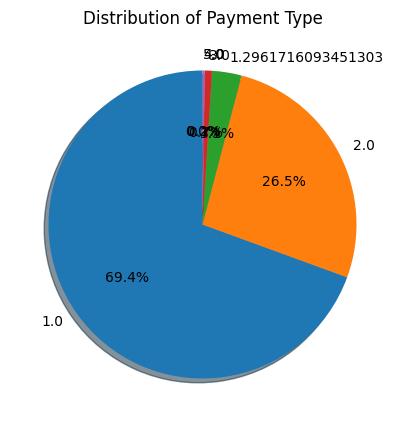

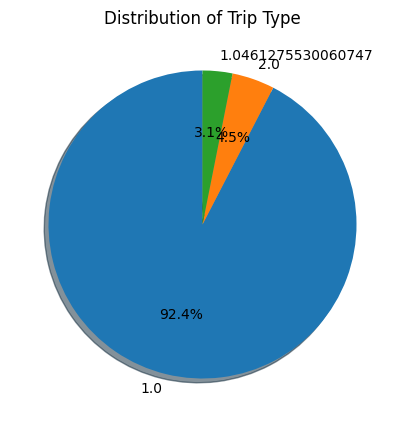

In [17]:
import matplotlib.pyplot as plt

# Payment Type Pie Chart
plt.figure(figsize=(8, 5))
nycgreen['payment_type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, shadow=True)
plt.title("Distribution of Payment Type")
plt.ylabel('')
plt.show()

# Trip Type Pie Chart
plt.figure(figsize=(8, 5))
nycgreen['trip_type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, shadow=True)
plt.title("Distribution of Trip Type")
plt.ylabel('')
plt.show()

In [18]:
print(nycgreen.groupby("weekday")["total_amount"].mean())
print(nycgreen.groupby("payment_type")["total_amount"].mean())
print(nycgreen.groupby("weekday")["tip_amount"].mean())
print(nycgreen.groupby("payment_type")["tip_amount"].mean())


weekday
Friday       24.730938
Monday       24.019751
Saturday     24.720046
Sunday       24.975039
Thursday     24.608970
Tuesday      24.568014
Wednesday    24.412463
Name: total_amount, dtype: float64
payment_type
1.000000    25.818791
1.296172    33.434778
2.000000    21.047274
3.000000     4.137805
4.000000     1.821781
5.000000    11.250000
Name: total_amount, dtype: float64
weekday
Friday       2.611089
Monday       2.559621
Saturday     2.594308
Sunday       2.686409
Thursday     2.641508
Tuesday      2.635646
Wednesday    2.730410
Name: tip_amount, dtype: float64
payment_type
1.000000    3.616412
1.296172    4.180872
2.000000    0.000000
3.000000    0.000000
4.000000    0.000000
5.000000    0.000000
Name: tip_amount, dtype: float64


In [19]:
from scipy.stats import f_oneway

groups = [group["total_amount"].values for name, group in nycgreen.groupby("trip_type")]
f_stat, p_val = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat}, p-value: {p_val}")


ANOVA F-statistic: 2137.483074222606, p-value: 0.0


In [20]:
groups = [group["total_amount"].values for name, group in nycgreen.groupby("weekday")]
f_stat, p_val = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat}, p-value: {p_val}")


ANOVA F-statistic: 1.929567137283583, p-value: 0.07210678626713803


In [21]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(nycgreen["trip_type"], nycgreen["payment_type"])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi-Square statistic: {chi2}, p-value: {p}")


Chi-Square statistic: 60654.30082246292, p-value: 0.0


In [22]:
numeric_cols = nycgreen[['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
                'tolls_amount', 'improvement_surcharge', 'congestion_surcharge',
                'trip_duration', 'passenger_count']]


In [23]:
object_cols = nycgreen[['store_and_fwd_flag', 'RatecodeID', 'payment_type', 'trip_type', 'weekday', 'hour']]


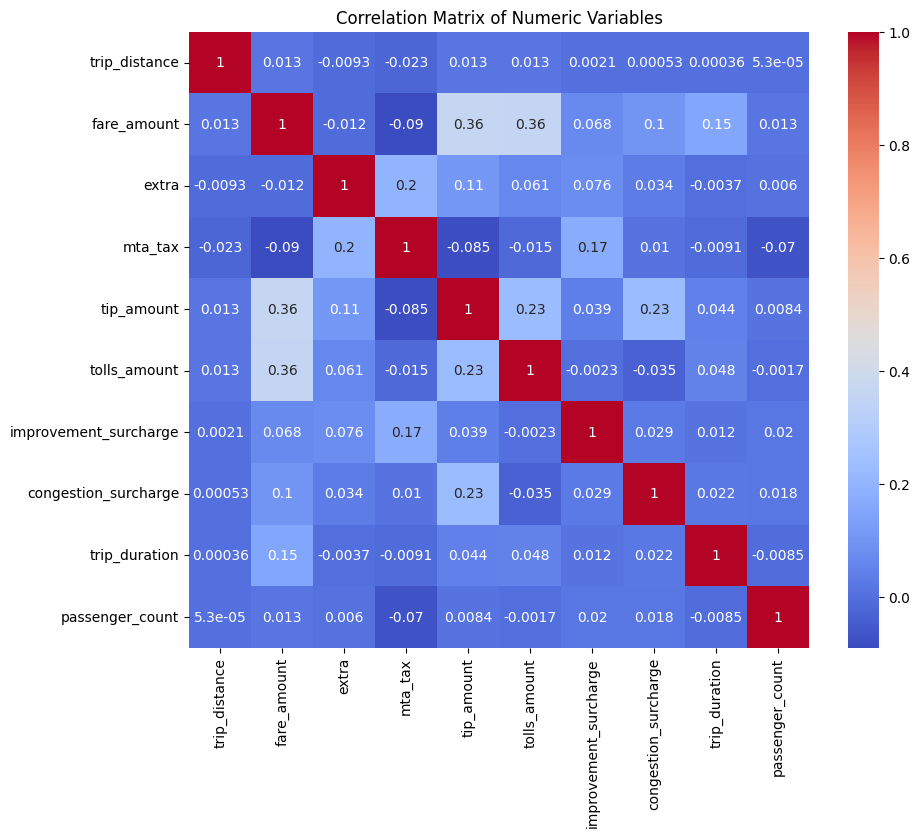

In [24]:
import seaborn as sns

plt.figure(figsize=(10,8))
# Correctly use numeric_cols as a list of columns to select data from nycgreen
corr = nycgreen[numeric_cols.columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Variables")
plt.show()

In [25]:

nycgreen_encoded = nycgreen.drop(columns=['lpep_pickup_datetime', 'lpep_dropoff_datetime'])


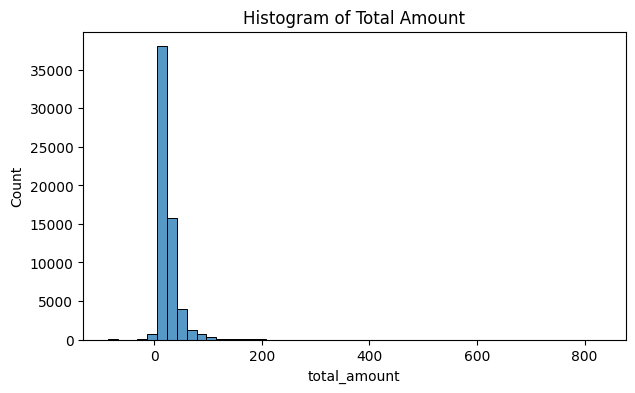

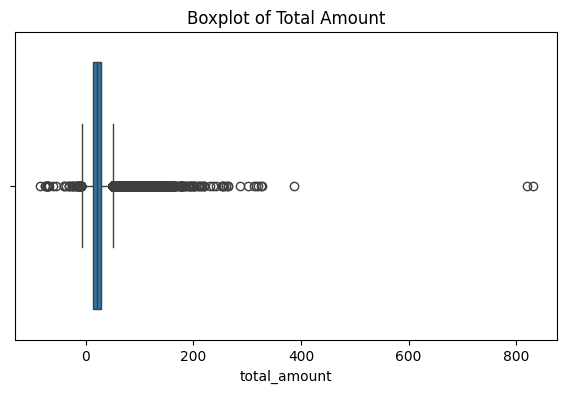

<ipython-input-26-762c50949424>:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(nycgreen['total_amount'], shade=True)


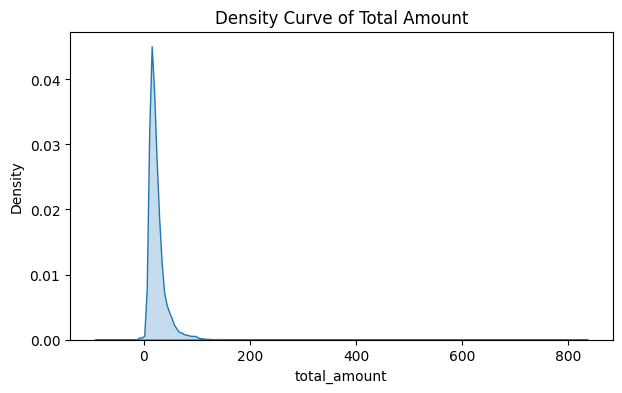

In [26]:
import seaborn as sns

# Histogram
plt.figure(figsize=(7,4))
sns.histplot(nycgreen['total_amount'], bins=50, kde=False)
plt.title("Histogram of Total Amount")
plt.show()

# Boxplot
plt.figure(figsize=(7,4))
sns.boxplot(x=nycgreen['total_amount'])
plt.title("Boxplot of Total Amount")
plt.show()

# Density Curve
plt.figure(figsize=(7,4))
sns.kdeplot(nycgreen['total_amount'], shade=True)
plt.title("Density Curve of Total Amount")
plt.show()


In [40]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [49]:
from sklearn.model_selection import train_test_split
# Assume 'target' is the column you're trying to predict, adjust as needed
X = nycgreen.drop(['fare_amount','lpep_pickup_datetime', 'lpep_dropoff_datetime'], axis=1)
y = nycgreen['fare_amount']

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
!pip install category_encoders
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import category_encoders as ce


# Assume 'target' is the column you're trying to predict, adjust as needed
X = nycgreen.drop(['fare_amount','lpep_pickup_datetime', 'lpep_dropoff_datetime'], axis=1)
y = nycgreen['fare_amount']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object','category']).columns.tolist()

# Initialize the encoder - using OneHotEncoder here
encoder = ce.OneHotEncoder(cols=categorical_cols, handle_unknown='ignore')

# Fit and transform the encoder on the training data
X_encoded = encoder.fit_transform(X)

# Split the encoded data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
print("Multiple Linear Regression Performance:")
print("R-squared:", r2_score(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.3 MB/s eta 0:00:00
Multiple Linear Regression Performance:
R-squared: 0.999204183269234
MSE: 0.19959736646182932


In [53]:
# Initialize the model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree Regressor Performance:")
print("R-squared:", r2_score(y_test, y_pred_dt))
print("MSE:", mean_squared_error(y_test, y_pred_dt))


Decision Tree Regressor Performance:
R-squared: 0.9862555699455252
MSE: 3.447215842963691


In [54]:
# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Regressor Performance:")
print("R-squared:", r2_score(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))


Random Forest Regressor Performance:
R-squared: 0.9853797637391515
MSE: 3.666875226292927


In [55]:
# Initialize the model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting Regressor Performance:")
print("R-squared:", r2_score(y_test, y_pred_gb))
print("MSE:", mean_squared_error(y_test, y_pred_gb))


Gradient Boosting Regressor Performance:
R-squared: 0.9890210899023374
MSE: 2.753600744238576


In [58]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

# Save the model
joblib.dump(model, "your_model.pkl")
print("✅ Model saved as your_model.pkl")


RMSE: 1.91
✅ Model saved as your_model.pkl
